## K-NN Algorithm from Scratch with Wine Dataset
This is an Homework for the ELE 489: Fundamentals of Machine Learning course. This notebook implements the K-NN algorithm from scratch to classify the Wine dataset. The following steps will guide you through necessary data preprocessing, visualizations, implementation of k-NN, and model evaluation.

### İmporting Libraries
Firstly we will import the necessary libraries for our project.

In [111]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import mode
from collections import Counter

### Loading and Reviewing the Dataset
Secondly we will load the Wine dataset and assign appropriate column names to it.

In [112]:
wine_data = pd.read_csv('wine.data', header=None)
wine_data.columns = ['Class', 'Alcohol', 'Malic_Acid', 'Ash', 'Alcalinity_of_Ash', 'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280/OD315_of_diluted_wines', 'Proline']

print(wine_data.head())

   Class  Alcohol  Malic_Acid   Ash  Alcalinity_of_Ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color_intensity   Hue  OD280/OD315_of_diluted_wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05  

### Separation of Features and Target
Now we will separate the features (X) and the target variable (y).

In [113]:
x = wine_data.iloc[:, 1:]
y = wine_data.iloc[:, 0] # class 


### Splitting Data into Training and Testing Sets
Then we will split the data into training and testing sets. Training data will be 80%, and testing data will be 20%. We used train_test_split() from sklearn to randomly split the data and set a random seed to ensure reproducibility of the split. Also we used np.asarray() so that data is converted into a format that's well-suited for numerical computations and more compatible with machine learning models like k-NN.

In [114]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=0)

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

print(x_train.shape)
print(x_test.shape)

(142, 13)
(36, 13)


### Normalizing the Data
Now we will normalize the dataset to scale the features.

In [115]:
scaler = Normalizer().fit(x_train)
normalized_x_train = scaler.transform(x_train)
normalized_x_test = scaler.transform(x_test)

### Visualizing the Wine dataset
We used histograms to show the distribution of different features in the dataset, pie charts to see the class distribution in both y_train and y_test, and scatter plots to look at how different wine attributes are related. These visualizations help us understand the data's spread, class balance, and the relationships between features.

##### Histogram graphs
The histograms display the distribution of different wine attributes. 

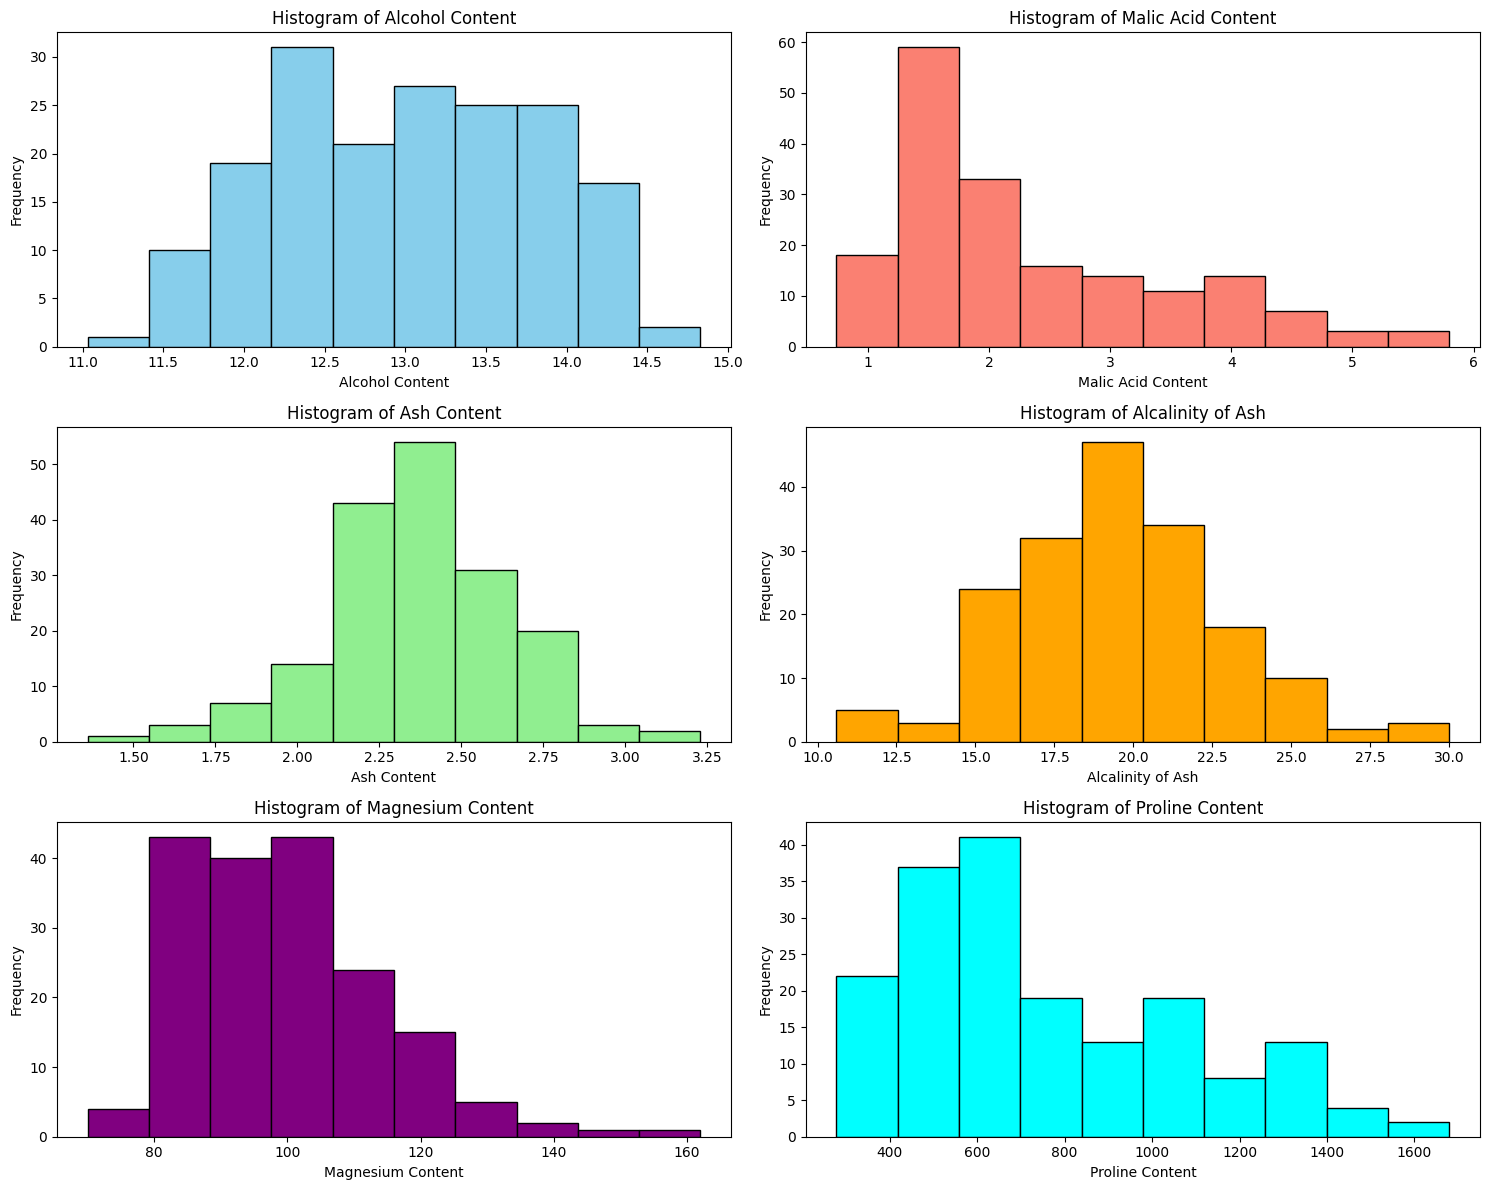

In [116]:
y_train_counter = Counter(y_train) #class distributions of y_train
y_test_counter = Counter(y_test) #class distributions of y_test

plt.figure(figsize=(15, 12)) #multiple histograms in a single figure

# 1. Alcohol Histogram
plt.subplot(3, 2, 1)
wine_data['Alcohol'].plot(kind='hist', bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Frequency')

# 2. Malic Acid Histogram
plt.subplot(3, 2, 2)
wine_data['Malic_Acid'].plot(kind='hist', bins=10, color='salmon', edgecolor='black')
plt.title('Histogram of Malic Acid Content')
plt.xlabel('Malic Acid Content')
plt.ylabel('Frequency')

# 3. Ash Histogram
plt.subplot(3, 2, 3)
wine_data['Ash'].plot(kind='hist', bins=10, color='lightgreen', edgecolor='black')
plt.title('Histogram of Ash Content')
plt.xlabel('Ash Content')
plt.ylabel('Frequency')

# 4. Alcalinity of Ash Histogram
plt.subplot(3, 2, 4)
wine_data['Alcalinity_of_Ash'].plot(kind='hist', bins=10, color='orange', edgecolor='black')
plt.title('Histogram of Alcalinity of Ash')
plt.xlabel('Alcalinity of Ash')
plt.ylabel('Frequency')

# 5. Magnesium Histogram
plt.subplot(3, 2, 5)
wine_data['Magnesium'].plot(kind='hist', bins=10, color='purple', edgecolor='black')
plt.title('Histogram of Magnesium Content')
plt.xlabel('Magnesium Content')
plt.ylabel('Frequency')

# 6. Proline Histogram
plt.subplot(3, 2, 6)
wine_data['Proline'].plot(kind='hist', bins=10, color='cyan', edgecolor='black')
plt.title('Histogram of Proline Content')
plt.xlabel('Proline Content')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

##### Pie charts
The pie charts show how the classes are distributed in the training and test datasets. In the training set (y_train), the distribution is quite balanced, with Classes 1, 2, and 3 having similar amounts. However, in the test set (y_test), Class 3 is less represented, which could affect the model’s performance, especially for predicting Class 3. This difference might cause the model to be biased toward Classes 1 and 2 in the test results.

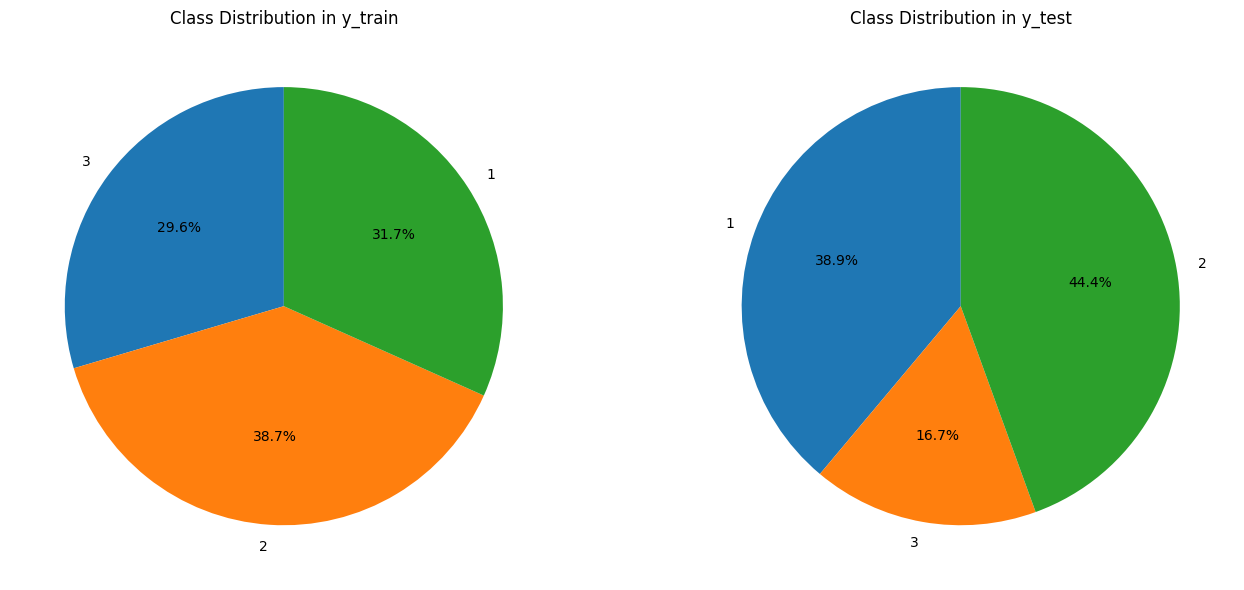

In [117]:
plt.figure(figsize=(14, 6))

# y_train için Pie chart
plt.subplot(1, 2, 1)
plt.pie(y_train_counter.values(), labels=y_train_counter.keys(), autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution in y_train')

# y_test için Pie chart
plt.subplot(1, 2, 2)
plt.pie(y_test_counter.values(), labels=y_test_counter.keys(), autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution in y_test')

plt.tight_layout()  # Grafiklerin arasındaki boşluğu ayarlıyoruz
plt.show()

##### Scatter graphs
The scatter plots below show the relationships between different wine features, such as Alcohol, Malic Acid, Flavanoids, and others, and their respective classes. Each class is represented by a different color. From these plots, we can see that some features show clear separation between classes, while others have more overlap. For instance, in the Hue vs OD280/OD315 of diluted wines plot, Classes 1 and 2 are more grouped together, while Class 3 is more spread out. However, in the Flavanoids vs Nonflavanoid Phenols plot, Class 3 stands out more from the other classes, while Classes 1 and 2 overlap more. Additionally, in the Proanthocyanins vs Color Intensity plot, there is noticeable overlap between Class 1 and Class 2, but Class 3 is more distinct, especially at lower levels of Proanthocyanins.

These overlaps suggest that the features alone might not fully separate the classes, meaning that more advanced classification methods may be needed to distinguish them accurately.

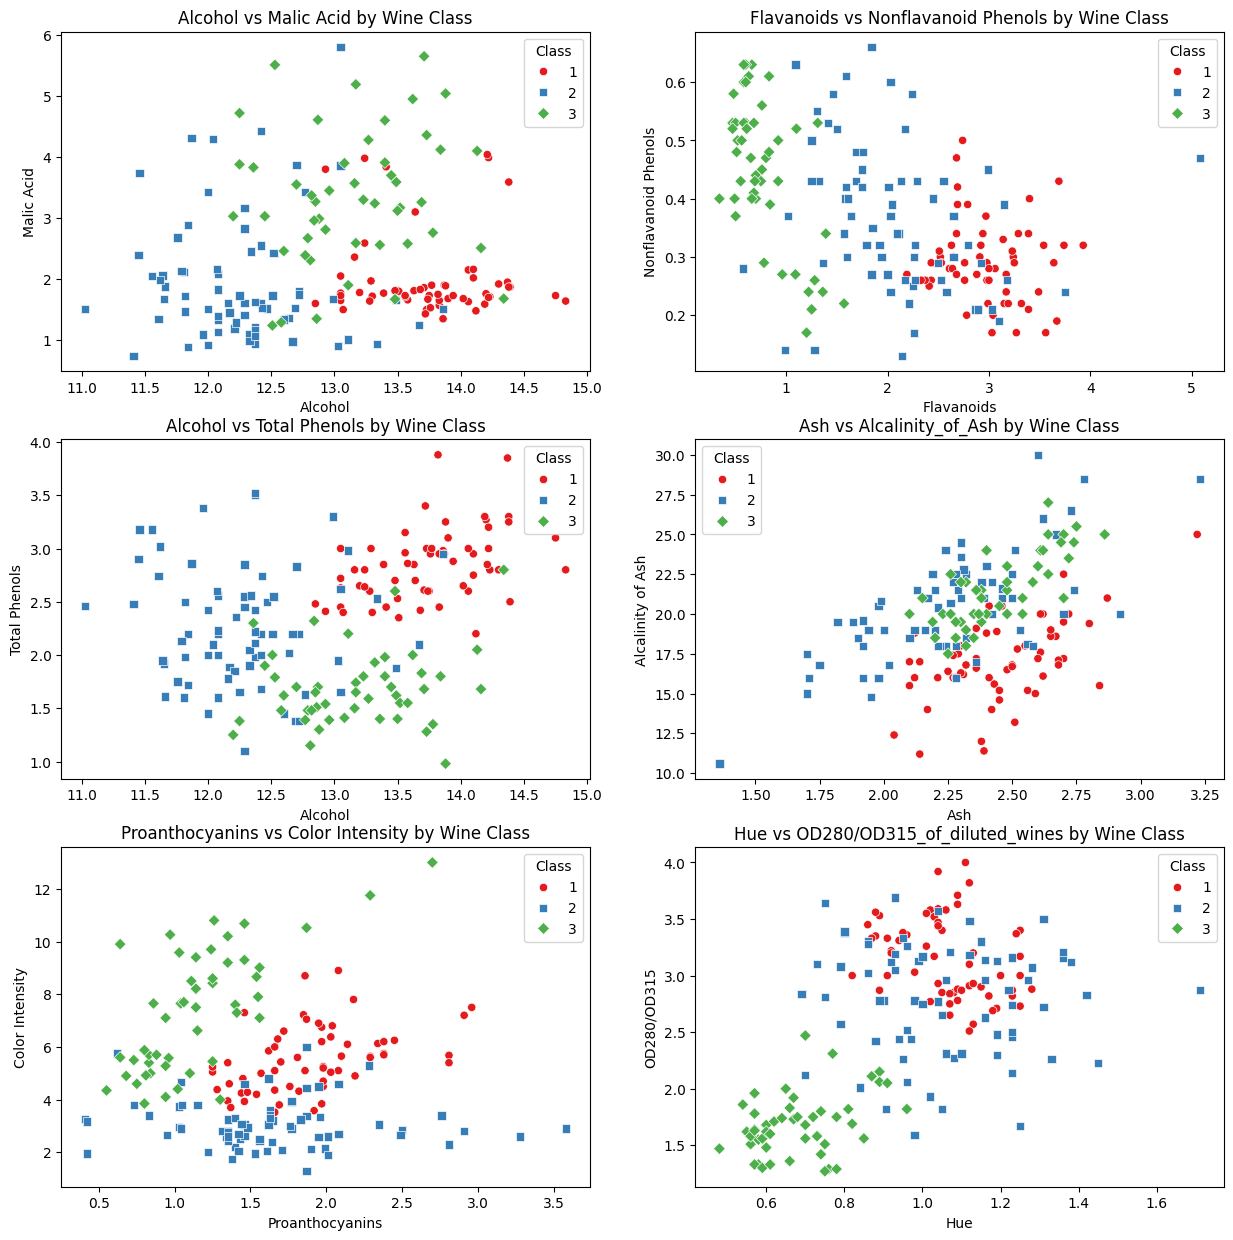

In [118]:
plt.figure(figsize=(15, 15))

# Alcohol vs Malic_Acid
plt.subplot(3, 2, 1)
sns.scatterplot(data=wine_data, x='Alcohol', y='Malic_Acid', hue='Class', palette='Set1', style='Class', markers=['o', 's', 'D'])
plt.title('Alcohol vs Malic Acid by Wine Class')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')

# Flavanoids vs Nonflavanoid Phenols
plt.subplot(3, 2, 2)
sns.scatterplot(data=wine_data, x='Flavanoids', y='Nonflavanoid_phenols', hue='Class', palette='Set1', style='Class', markers=['o', 's', 'D'])
plt.title('Flavanoids vs Nonflavanoid Phenols by Wine Class')
plt.xlabel('Flavanoids')
plt.ylabel('Nonflavanoid Phenols')

# Alcohol vs Total Phenols
plt.subplot(3, 2, 3)
sns.scatterplot(data=wine_data, x='Alcohol', y='Total_phenols', hue='Class', palette='Set1', style='Class', markers=['o', 's', 'D'])
plt.title('Alcohol vs Total Phenols by Wine Class')
plt.xlabel('Alcohol')
plt.ylabel('Total Phenols')

# Ash vs Alcalinity_of_Ash
plt.subplot(3, 2, 4)
sns.scatterplot(data=wine_data, x='Ash', y='Alcalinity_of_Ash', hue='Class', palette='Set1', style='Class', markers=['o', 's', 'D'])
plt.title('Ash vs Alcalinity_of_Ash by Wine Class')
plt.xlabel('Ash')
plt.ylabel('Alcalinity of Ash')

# Proanthocyanins vs Color Intensity
plt.subplot(3, 2, 5)
sns.scatterplot(data=wine_data, x='Proanthocyanins', y='Color_intensity', hue='Class', palette='Set1', style='Class', markers=['o', 's', 'D'])
plt.title('Proanthocyanins vs Color Intensity by Wine Class')
plt.xlabel('Proanthocyanins')
plt.ylabel('Color Intensity')

# Hue vs OD280/OD315_of_diluted_wines
plt.subplot(3, 2, 6)
sns.scatterplot(data=wine_data, x='Hue', y='OD280/OD315_of_diluted_wines', hue='Class', palette='Set1', style='Class', markers=['o', 's', 'D'])
plt.title('Hue vs OD280/OD315_of_diluted_wines by Wine Class')
plt.xlabel('Hue')
plt.ylabel('OD280/OD315')

plt.show()

### K-NN Algorithm from Scratch
The code below describes an algorithm that calculates the distance between a test point and each training point, finds the K nearest neighbors based on the chosen distance measure, and then assigns the most common class label from these neighbors.
Euclidean Distance measures the straight-line distance between two points.
Manhattan Distance measures the distance between two points along axes at right angles.
Minkowski Distance Generalization of both Euclidean and Manhattan distances, where the parameter p controls the metric. When p=2, it becomes Euclidean distance, and when p=1, it becomes Manhattan distance. In this case, we used p=3.

In [119]:
# Euclidean distance
def distance_euclidean(x_train, x_test_point):
    distances = []
    for row in range(len(x_train)):
        current_train_point = x_train[row]
        current_distance = np.sum((current_train_point - x_test_point) ** 2)
        distances.append(np.sqrt(current_distance))
    
    dist = pd.DataFrame(data=distances, columns=['dist'])
    return dist

# Manhattan distance
def distance_manhattan(x_train, x_test_point):
    distances = []
    for row in range(len(x_train)):
        current_train_point = x_train[row]
        current_distance = np.sum(np.abs(current_train_point - x_test_point))
        distances.append(current_distance)
    return pd.DataFrame(data=distances, columns=['dist'])

# Minkowski distance
def distance_minkowski(x_train, x_test_point, p=3):
    distances = []
    for row in range(len(x_train)):
        current_train_point = x_train[row]
        current_distance = np.sum(np.abs(current_train_point - x_test_point) ** p)
        distances.append(np.power(current_distance, 1/p))  # Minkowski mesafesi
    return pd.DataFrame(data=distances, columns=['dist'])

# Finding the nearest neighbors
def nearest_neighbors(distance_point, K):
    df_nearest = distance_point.sort_values(by=['dist'], axis=0)
    df_nearest = df_nearest[:K]
    return df_nearest

# Finding the most common class in the neighbors
def voting(df_nearest, y_train):
    neighbors_classes = y_train[df_nearest.index] # Finding the class of the neighbors
    frequency = {}
    for label in neighbors_classes:
        if label in frequency:
            frequency[label] += 1
        else:
            frequency[label] = 1
    
    vote = max(frequency, key=frequency.get) # finding the most common
    return vote


# k-NN Algorithm
def KNN_from_scratch(x_train, y_train, x_test, K, distance_metric='euclidean'):
    y_pred = []
    for x_test_point in x_test:
        if distance_metric == 'euclidean':
            distance_point = distance_euclidean(x_train, x_test_point)
        elif distance_metric == 'manhattan':
            distance_point = distance_manhattan(x_train, x_test_point)
        elif distance_metric == 'minkowski':
            distance_point = distance_minkowski(x_train, x_test_point)

        df_nearest = nearest_neighbors(distance_point, K)
        y_pred_point = voting(df_nearest, y_train)
        y_pred.append(y_pred_point)

    return y_pred

### Accuracy calculations
In this section of the code, we calculate the accuracy of the K-NN algorithm for different distance calculations by varying the value of K. The K values are defined as K = 1, 3, 5, 7, 9. Next, the K-NN algorithm is applied for each K. The accuracy is calculated by comparing the predicted values to the true values using the np.mean() function. This provides the proportion of correct predictions.

In [120]:
k_values = list(range(1, 10, 2))  # For different K values (1, 3, 5, 7, 9)
print("k_values:", k_values)
accuracy_euclidean = []
accuracy_manhattan = []
accuracy_minkowski = []
print("y_test:", y_test)

# Accuracy calculations
for K in k_values:
    print("K: ", K)
    
    # Euclidean distance
    y_pred_euclidean = KNN_from_scratch(normalized_x_train, y_train, normalized_x_test, K, distance_metric='euclidean')
    accuracy_euclidean_value = np.mean(np.array(y_pred_euclidean) == y_test)
    accuracy_euclidean.append(accuracy_euclidean_value)
    print("y_pred_euclidean:", y_pred_euclidean)
    print("Accuracy (Euclidean):", accuracy_euclidean_value)
    
    # Manhattan distance
    y_pred_manhattan = KNN_from_scratch(normalized_x_train, y_train, normalized_x_test, K, distance_metric='manhattan')
    accuracy_manhattan_value = np.mean(np.array(y_pred_manhattan) == y_test)
    accuracy_manhattan.append(accuracy_manhattan_value)
    print("y_pred_manhattan:", y_pred_manhattan)
    print("Accuracy (Manhattan):", accuracy_manhattan_value)
    
    # Minkowski distance
    y_pred_minkowski = KNN_from_scratch(normalized_x_train, y_train, normalized_x_test, K, distance_metric='minkowski')
    accuracy_minkowski_value = np.mean(np.array(y_pred_minkowski) == y_test)
    accuracy_minkowski.append(accuracy_minkowski_value)
    print("y_pred_minkowski:", y_pred_minkowski)
    print("Accuracy (Minkowski):", accuracy_minkowski_value)


k_values: [1, 3, 5, 7, 9]
y_test: [1 3 2 1 2 2 1 3 2 2 3 3 1 2 3 2 1 1 2 1 2 1 1 2 2 2 2 2 2 3 1 1 2 1 1 1]
K:  1
y_pred_euclidean: [1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1, 3, 2, 2, 2, 2, 3, 3, 3, 1, 1, 3, 1, 1, 1]
Accuracy (Euclidean): 0.8611111111111112
y_pred_manhattan: [1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 3, 3, 1, 1, 3, 1, 1, 1]
Accuracy (Manhattan): 0.9166666666666666
y_pred_minkowski: [1, 3, 2, 1, 2, 2, 1, 3, 2, 3, 1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1, 3, 2, 2, 2, 2, 3, 3, 3, 1, 1, 3, 1, 1, 1]
Accuracy (Minkowski): 0.8333333333333334
K:  3
y_pred_euclidean: [1, 2, 2, 1, 2, 3, 1, 3, 2, 3, 1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1, 3, 2, 2, 2, 2, 2, 3, 3, 1, 1, 3, 1, 1, 1]
Accuracy (Euclidean): 0.8055555555555556
y_pred_manhattan: [1, 2, 2, 1, 2, 3, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 3, 3, 1, 1, 3, 1, 1, 1]
Accuracy (Manhattan): 0.8888888888888888
y_pred_minkowski: [1, 2, 2, 1, 2, 3, 1, 

### K vs Accuracy graphs
The code below creates a graph that compares how well the K-NN algorithm works with three different distance calculations.

From the graph, we can see that Manhattan distance usually gives the best accuracy, especially at K=5, where it reaches around 0.95. Euclidean distance works well at K=1, but its performance slightly decreases as K gets bigger. Minkowski distance usually gives lower accuracy than Euclidean and Manhattan, but it still does better than Euclidean at K=1.

When we look at the best K values, Manhattan distance gives the highest accuracy overall, with the best K being 5.For the minkowski and Euclidean distances, K=1 can give good results, but it might be too sensitive to noise and outliers in the data. K=5 is better because it provides a more balanced and generalized result.

So, while K=1 can seem useful, especially with Euclidean and Minkowski distances, a larger K value like K=5 tends to give a more stable and general result.

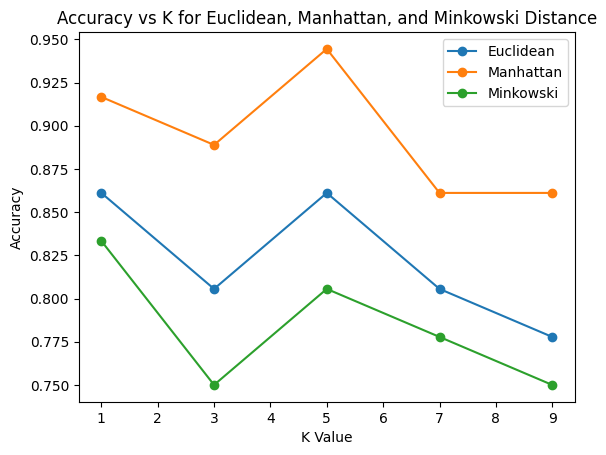

In [121]:
# K vs Accuracy graphs
plt.plot(k_values, accuracy_euclidean, label='Euclidean', marker='o')  
plt.plot(k_values, accuracy_manhattan, label='Manhattan', marker='o')  
plt.plot(k_values, accuracy_minkowski, label='Minkowski', marker='o')  

plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K for Euclidean, Manhattan, and Minkowski Distance')
plt.legend()
plt.show()

### Confusion Matrix Calculations
In code below, we evaluate the performance of the k-NN model using the best values of k for each distance calculations. The best_k_euclidean, best_k_manhattan, and best_k_minkowski variables hold the best k values for each respective distance metric. These values are chosen based on previous analysis where we evaluated different k values and selected the one that gave the best performance. Once the best k values are set, we make predictions using the KNN_from_scratch function for each distance metric by passing the corresponding k values. Next, we calculate the confusion matrix for each of the three distance metrics using the confusion_matrix function from the sklearn.metrics module.

The confusion matrix is a useful tool for evaluating how well a classification model performs. It compares the predicted labels to the true labels. Each row in the matrix corresponds to the true class, while each column represents the predicted class. The values along the diagonal show the number of correct predictions, while the off-diagonal values represent misclassifications.

In [122]:
# Confusion Matrix for the best k value
best_k = 5
y_pred_best_euclidean = KNN_from_scratch(normalized_x_train, y_train, normalized_x_test, best_k, distance_metric='euclidean')
y_pred_best_manhattan = KNN_from_scratch(normalized_x_train, y_train, normalized_x_test, best_k, distance_metric='manhattan')
y_pred_best_minkowski = KNN_from_scratch(normalized_x_train, y_train, normalized_x_test, best_k, distance_metric='minkowski')

cm_euclidean = confusion_matrix(y_test, y_pred_best_euclidean)
cm_manhattan = confusion_matrix(y_test, y_pred_best_manhattan)
cm_minkowski = confusion_matrix(y_test, y_pred_best_minkowski)

print("Confusion Matrix (Euclidean):\n", cm_euclidean)
print("Confusion Matrix (Manhattan):\n", cm_manhattan)
print("Confusion Matrix (minkowski):\n", cm_minkowski)


Confusion Matrix (Euclidean):
 [[13  0  1]
 [ 0 14  2]
 [ 1  1  4]]
Confusion Matrix (Manhattan):
 [[14  0  0]
 [ 0 15  1]
 [ 0  1  5]]
Confusion Matrix (minkowski):
 [[13  0  1]
 [ 0 12  4]
 [ 1  1  4]]


### Visualizing the confusion matrix with heatmaps
The code below is to plot the confusion matrices for three different distance calculations used in the k-NN algorithm.

If we compare the result of confusion matrix for the different distance calculations. Matrix of Euclidean Distance shows that the model performs well for Class 1 and Class 2, with a few misclassifications for Class 3. Class 3 predictions are mostly correct, but there are a few errors (e.g., misclassifying Class 3 as Class 1). for the Manhattan Distance it performs better overall, with perfect classification for Class 1. Class 2 is also well predicted with minimal errors, and Class 3 shows good performance with only a few misclassifications. Finally, Minkowski Distance gives similar results to Euclidean, with a few more misclassifications, especially for Class 3. It is less effective than Manhattan, but still performs decently for the other classes.

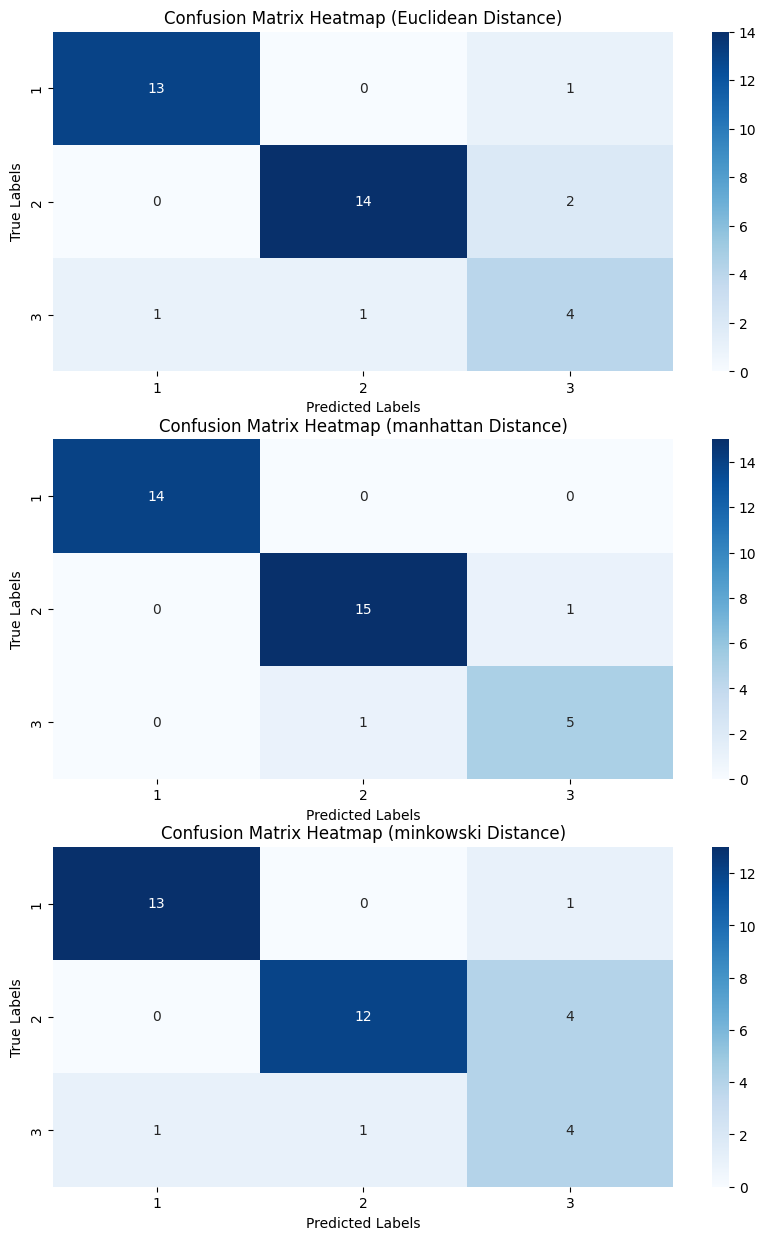

In [123]:
# Confusion Matrix Heatmap for Euclidean
plt.figure(figsize=(10, 15))
plt.subplot(3, 1, 1)
sns.heatmap(cm_euclidean, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.title('Confusion Matrix Heatmap (Euclidean Distance)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Confusion Matrix Heatmap for manhattan
plt.subplot(3, 1, 2)
sns.heatmap(cm_manhattan, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.title('Confusion Matrix Heatmap (manhattan Distance)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Confusion Matrix Heatmap for minkowski
plt.subplot(3, 1, 3)
sns.heatmap(cm_minkowski, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.title('Confusion Matrix Heatmap (minkowski Distance)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


### Classification Report Calculations
The code below prints the classification report for each distance metric to assess how well the K-NN classifier performed with each.

The classification report provides several important metrics to evaluate the performance of the K-NN model for different distance metrics. These metrics include Precision, Recall, F1 Score and Support.

Precision is the ratio of correctly predicted positive observations to the total predicted positives.It helps identify how many of the predicted positive cases were actually correct. Recall is the ratio of correctly predicted positive observations to all observations in actual class. It helps determine how many actual positive cases were captured. F1 Score is the weighted average of Precision and Recall. It balances both the concerns of precision and recall in one number. Support is the number of actual occurrences of the class in the dataset.

These classification reports for Euclidean, Manhattan, and Minkowski distances show varied performance across different metrics. For the Euclidean Distance, the model performed well with a high precision and recall for Class 1 and Class 2, but the performance for Class 3 was lower, with precision and recall around 0.57 and 0.67, respectively. The overall accuracy is 86%. for the Manhattan Distance, this metric performed the best overall, especially for Class 1, with perfect precision and recall of 1.00. Class 3 also saw a solid performance with an accuracy of 0.83. The overall accuracy was 94%, the highest among the three metrics. And for the Minkowski Distance, this metric showed moderate performance, with Class 3 performing the weakest. Overall accuracy was lower than Manhattan at 81%.

In conclusion, Manhattan distance provided the best overall classification performance, especially for Class 1 and Class 2, while Minkowski and Euclidean distances showed more variability, particularly with Class 3.

In [124]:
# Classification Report for Euclidean
print("\nClassification Report (Euclidean Distance):\n", classification_report(y_test, y_pred_best_euclidean))

# Classification Report for manhattan
print("\nClassification Report (manhattan Distance):\n", classification_report(y_test, y_pred_best_manhattan))

# Classification Report for minkowski
print("\nClassification Report (minkowski Distance):\n", classification_report(y_test, y_pred_best_minkowski))


Classification Report (Euclidean Distance):
               precision    recall  f1-score   support

           1       0.93      0.93      0.93        14
           2       0.93      0.88      0.90        16
           3       0.57      0.67      0.62         6

    accuracy                           0.86        36
   macro avg       0.81      0.82      0.82        36
weighted avg       0.87      0.86      0.87        36


Classification Report (manhattan Distance):
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       0.94      0.94      0.94        16
           3       0.83      0.83      0.83         6

    accuracy                           0.94        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.94      0.94      0.94        36


Classification Report (minkowski Distance):
               precision    recall  f1-score   support

           1       0.93      0.93      0.93  